# Exercício 3 - Rede Neural com Retropropagação 

Jean Carlos Mello Xavier Faria - 11259628

Leonardo Alves Amaral Torres   - 11261002

In [1]:
import numpy as np
import random 
import math
import matplotlib.pyplot as plt

In [2]:
class NN:
    def __init__(self, layers, eta):
        self.W = []
        self.layers = layers
        self.eta = eta

        for i in range(0, len(layers)-2):
            w = np.random.randn(layers[i] + 1, layers[i+1] + 1)
            self.W.append(w/np.sqrt(layers[i]))
        
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w/np.sqrt(layers[-2]))
        
    def sigmoid(self, x):
        return 1.0/ (1.0 + np.exp(-x))

    def predict(self, X):
        p = np.atleast_2d(X)
        p = np.c_[p, np.ones((p.shape[0]))]
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p 

    def sigmoid_derivada(self, x):
        return x*(1-x)

    def fit_partial(self, x, y):
        A = [np.atleast_2d(x)]
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])
            out = self.sigmoid(net)
            A.append(out)
        
        error = A[-1] - y
        Delt = [error * self.sigmoid_derivada(A[-1])]
        for layer in np.arange(len(A) -2,0,-1):
            delta = Delt[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_derivada(A[layer])
            Delt.append(delta)

        Delt = Delt[::-1]
        
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.eta*A[layer].T.dot(Delt[layer])

    def fit(self, X, y, Ne):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0,Ne):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)    

In [10]:
neurons = [3,4,5,10,15,20,50,100]

#Criando os dados de treino
x = np.zeros((4, 1000))
y = np.zeros((4,1000))

x[0] = [random.randrange(1,100) for i in range(len(x[1]))]
x[1] = [random.randrange(1,10) for i in range(len(x[1]))]
x[2] = [random.randrange(1,10) for i in range(len(x[1]))]
x[3] = [random.uniform(0, math.pi/2) for i in range(len(x[1]))]

y[0] = np.reciprocal(x[0])
y[1] = np.log10(x[1])
y[2] = np.exp(-x[2])
y[3] = np.sin(x[3])

# Criando os dados de teste
xteste = np.zeros((4,1000))
yteste = np.zeros((4,1000))

xteste[0] = np.linspace(1,100,1000)
yteste[0] = np.reciprocal(xteste[0])

xteste[1] = np.linspace(1,10,1000)
yteste[1] = np.log10(xteste[1])

xteste[2] = np.linspace(1,10,1000)
yteste[2] = np.exp(-xteste[2])

xteste[3] = np.linspace(0,math.pi/2,1000)
yteste[3]  = np.sin(xteste[3])

#Variáveis para cada caso
MSE1= []
MSE2 = []
MSE3=[]
MSE4=[]
MSE = []
ypred1 = []
ypred2 = []
ypred3 = []
ypred4 = []

In [11]:
#Função 1/x
for neuron in neurons: #Inicia o treinamento
    ypred = []
    rede = NN([1, neuron,1], 0.1)
    rede.fit(x[0], y[0], 100)
    for (xt, target) in zip(xteste[0], yteste[0]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    erro = np.sum(yteste[0]-ypred)**2/len(yteste[0])
    ypred1.append(ypred)
    MSE1.append(erro)
MSE.append(MSE1)

In [12]:
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron, 1], 0.1)
    rede.fit(x[1], y[1], 100)
    for (xt, target) in zip(xteste[1], yteste[1]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    erro = np.sum(yteste[1]-ypred)**2/len(yteste[1])
    ypred2.append(ypred)
    MSE2.append(erro)
MSE.append(MSE2)

In [13]:
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron, 1], 0.1)
    rede.fit(x[2], y[2], 100)
    for (xt, target) in zip(xteste[2], yteste[2]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    erro = np.sum(yteste[2]-ypred)**2/len(yteste[2])
    ypred3.append(ypred)
    MSE3.append(erro)
MSE.append(MSE3)

In [24]:
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron], 0.1)
    rede.fit(x[3], y[3], 100)
    for (xt, target) in zip(xteste[3], yteste[3]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    erro = np.sum(yteste[3]-ypred)**2/len(yteste[3])
    ypred4.append(ypred)
    MSE4.append(erro)
MSE.append(MSE4)

In [25]:
print("\t\tFunção 1/x 1 <= x <= 100\t\t")
print("Número de neurônios \t\t Erro Quadrático médio")

for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[0][i]))
print("----------------------------------------------------")

print("\t\tFunção log10(x) 1 <= x <= 10\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[1][i]))
print("----------------------------------------------------")

print("\t\tFunção exp(-x) 1 <= x <= 10\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[2][i]))
print("----------------------------------------------------")

print("\t\tFunção sen(x) 1 <= x <= pi/2\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[3][i]))
print("----------------------------------------------------")

		Função 1/x 1 <= x <= 100		
Número de neurônios 		 Erro Quadrático médio
	3 				 0.000198
	4 				 0.023912
	5 				 0.009834
	10 				 0.006760
	15 				 0.001151
	20 				 0.000975
	50 				 0.000031
	100 				 0.000543
----------------------------------------------------
		Função log10(x) 1 <= x <= 10		
	3 				 0.004635
	4 				 0.006674
	5 				 0.003938
	10 				 0.012147
	15 				 0.012035
	20 				 0.013300
	50 				 0.018850
	100 				 0.018691
----------------------------------------------------
		Função exp(-x) 1 <= x <= 10		
	3 				 0.031298
	4 				 0.024941
	5 				 0.024854
	10 				 0.016412
	15 				 0.014527
	20 				 0.013468
	50 				 0.008551
	100 				 0.005965
----------------------------------------------------
		Função sen(x) 1 <= x <= pi/2		
	3 				 0.017615
	4 				 0.012202
	5 				 0.013827
	10 				 0.013482
	15 				 0.016902
	20 				 0.008835
	50 				 0.003579
	100 				 0.002206
----------------------------------------------------


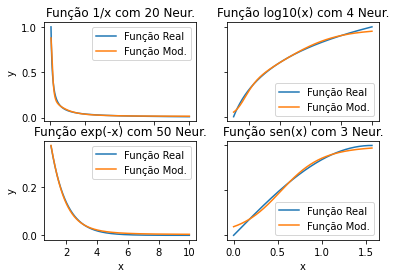

In [26]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xteste[0], yteste[0],xteste[0],ypred1[5])
axs[0,0].legend(labels=['Função Real', 'Função Mod.'])
axs[0, 0].set_title('Função 1/x com 20 Neur.')
axs[0, 1].plot(xteste[1], yteste[1],xteste[1],ypred2[1])
axs[0, 1].legend(labels=['Função Real', 'Função Mod.'])
axs[0, 1].set_title('Função log10(x) com 4 Neur.')
axs[1, 0].plot(xteste[2], yteste[2],xteste[2],ypred3[6])
axs[1, 0].legend(labels=['Função Real', 'Função Mod.'])
axs[1, 0].set_title('Função exp(-x) com 50 Neur.')
axs[1, 1].plot(xteste[3], yteste[3],xteste[3],ypred4[5])
axs[1, 1].legend(labels=['Função Real', 'Função Mod.'])
axs[1, 1].set_title('Função sen(x) com 3 Neur.')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
